# SARIMA

$\text{SARIMA}(p,d,q,P,D,Q)_S$ model has the form:

$$
\Phi_P(B^S)\phi_P(B)(1-B^S)^D(1-B)^dX_t = \Theta_Q(B^S)\theta_q(B)Z_t \\
\theta_q(B) = 1 + \theta_1B + \dots + \theta_qB^q \\
\Theta_Q(B) = 1 + \Theta_1B^S + \Theta_2B^{2S} + \dots + \Theta_QB^{QS} \\
\phi_p(B) = 1 - \phi_1B - \dots - \phi_pB^p \\
\Phi_P(B) = 1 - \Phi_1B^S - \Phi_2B^{2S} - \dots - \Phi_QB^{PS}
$$

**The parsimony principle**:

p + d + q + P + D + Q <= 6

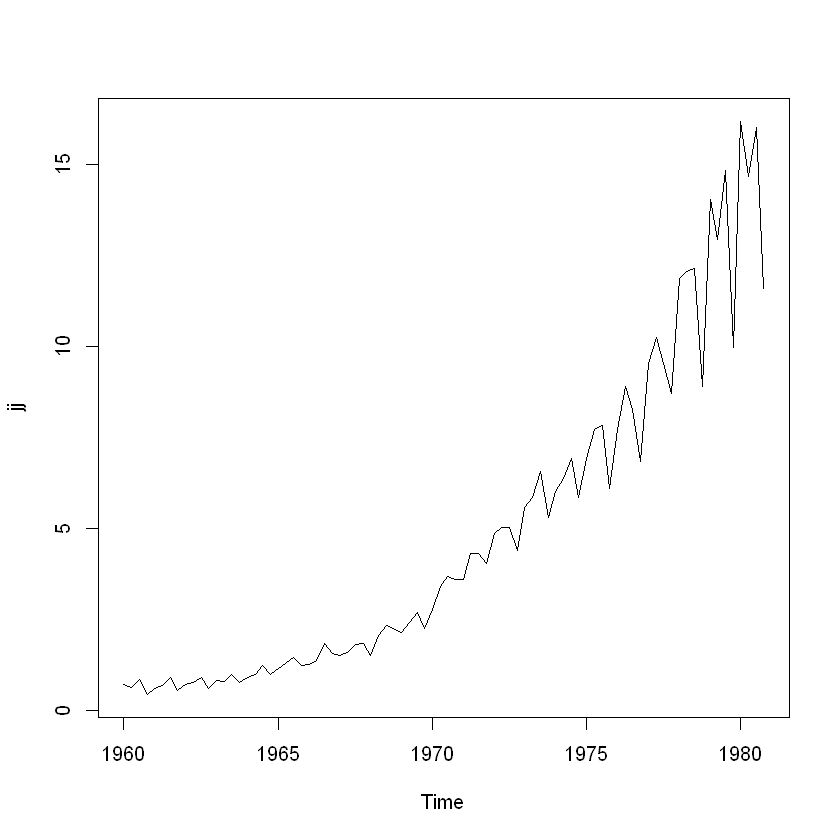

In [1]:
library(astsa)

plot(jj)

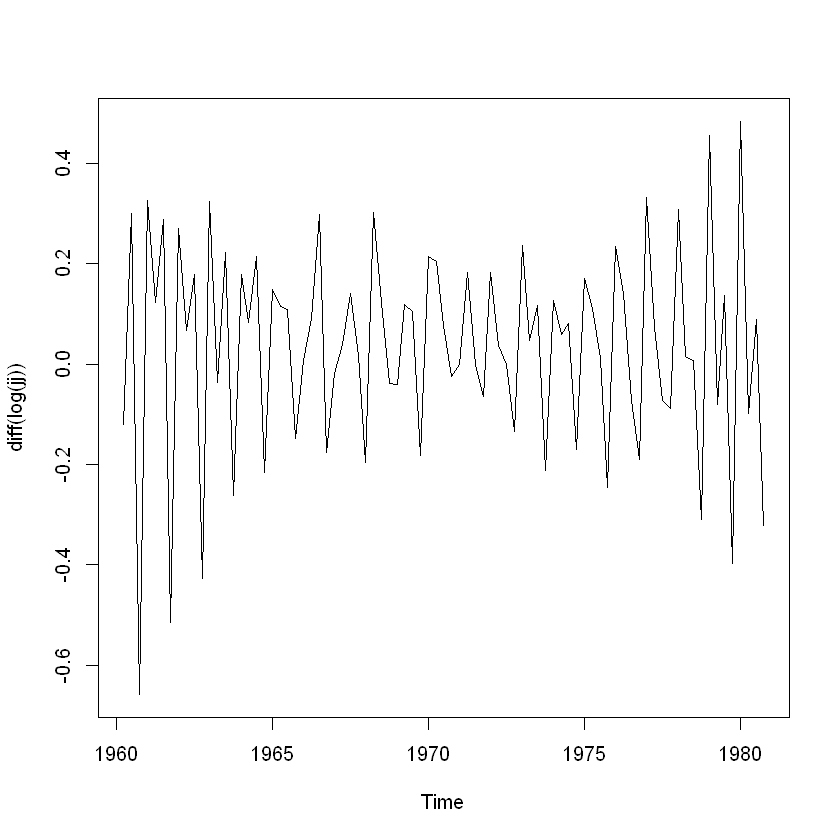

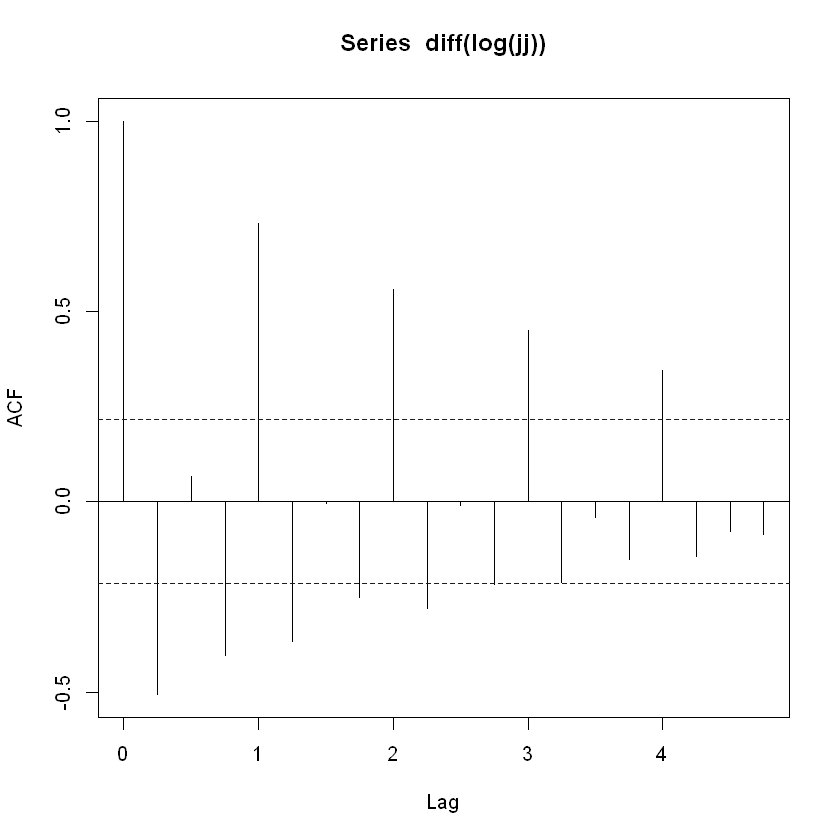

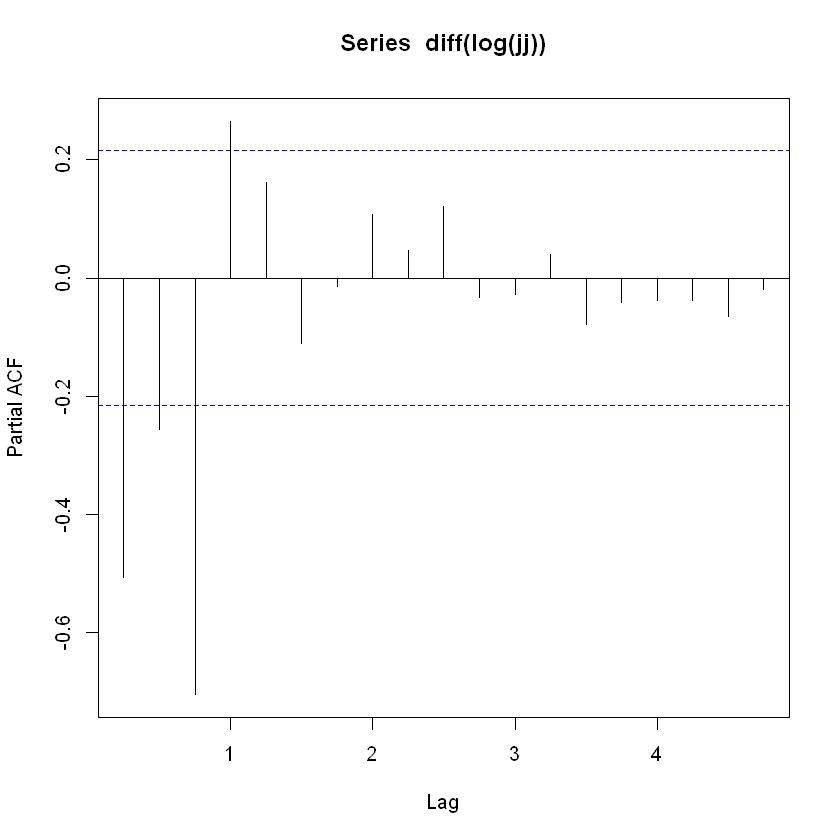

In [4]:
plot(diff(log(jj)))
acf(diff(log(jj)))
pacf(diff(log(jj)))

From ACF it appears that there is strong autocorrelation at lag 4, 8, 12 and that is because of the seasonality. Thus, what we would like to do is to take a seasonal differene:

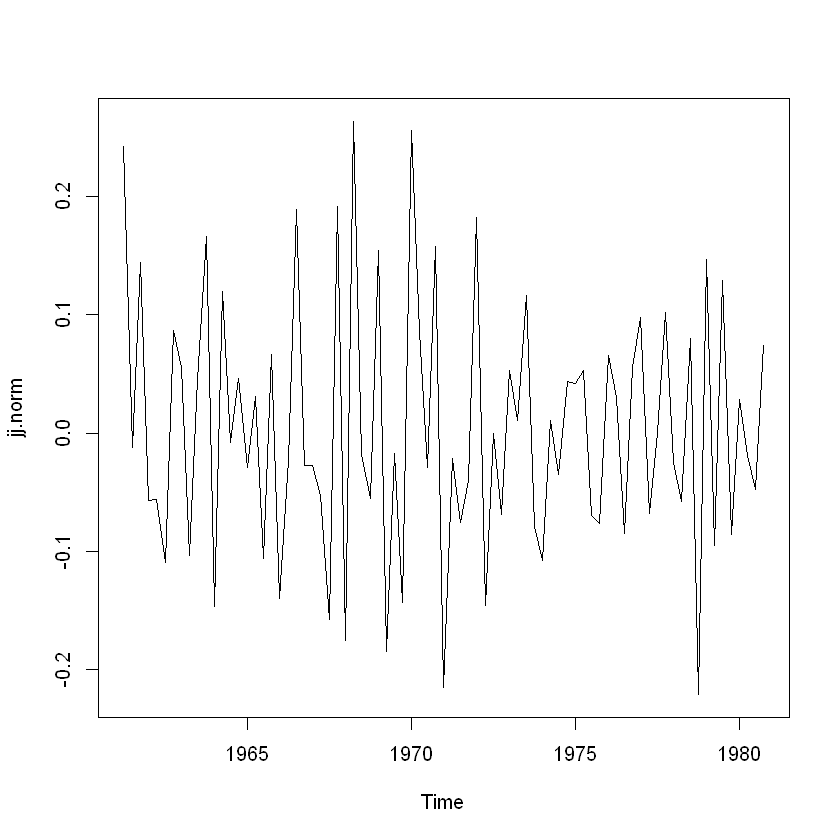

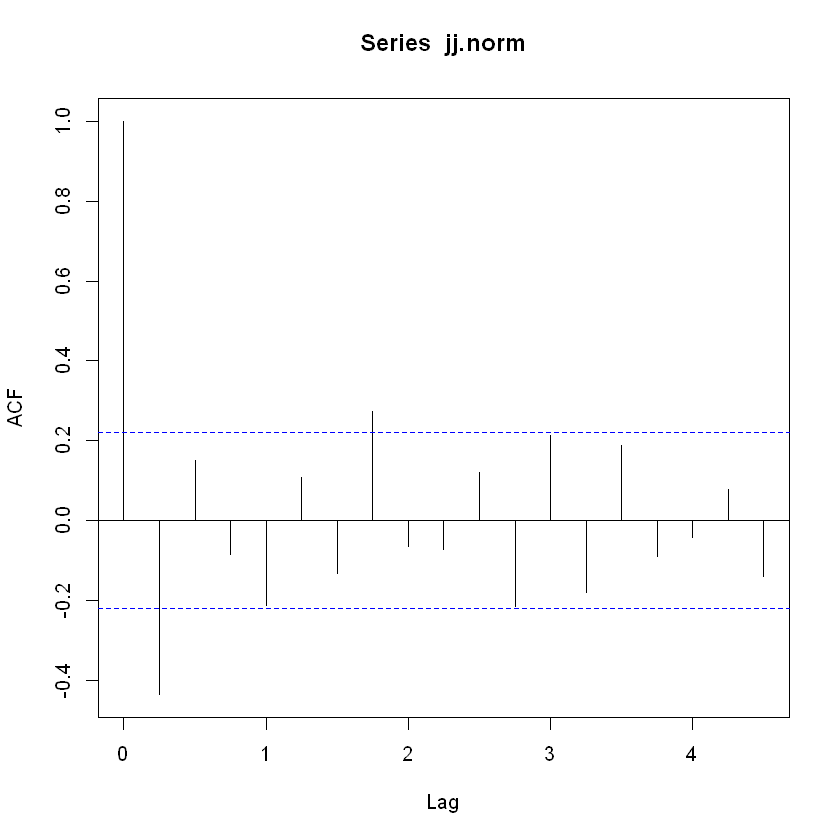

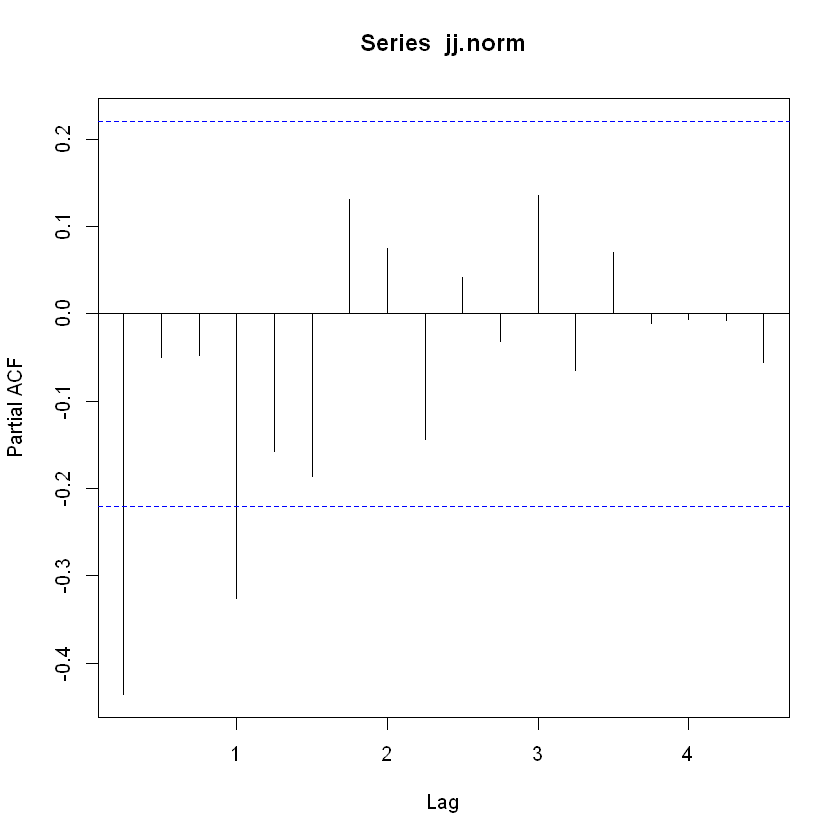

In [6]:
jj.norm = diff(diff(log(jj)),4)
plot(jj.norm)
acf(jj.norm)
pacf(jj.norm)

From ACF, there is one significant spike at lag = 1, others are barely significant. PACF has a significant lag at 1 and 4 (**note** for some reason instructor ignored lag=4, putting this on seasonality). This suggests that q in {0,1}; Q in {0,1} (difference), p in {0,1} and P in {0,1} (difference) and seasonality is 4 (d = 1 and S = 4 comes from `diff(diff(log(jj)),4)`)

In [10]:
# just to check if our transformed data is autocorrelated. p-value < significance, so it is autocorrelated.
Box.test(jj.norm, lag=log(length(jj.norm)))


	Box-Pierce test

data:  jj.norm
X-squared = 20.95, df = 4.3694, p-value = 0.0004658


In [16]:
# MA order
q = c(0,1)
# AR order
p = c(0,1)
P = c(0,1)
Q = c(0,1)

res = matrix(0, 2**4, 7)
id = 1
for (qq in q) {
    for (pp in p) {
        for (PP in P) {
            for (QQ in Q) {
                res[id,] = c(AIC(arima(log(jj), order=c(pp, 1, qq), seasonal=list(order=c(PP, 1, QQ), period=4))), pp, 1, qq, PP, 1, QQ)
                id = id + 1
            }
        }
    }
}
res

-124.0685,0,1,0,0,1,0
-126.3493,0,1,0,0,1,1
-125.9198,0,1,0,1,1,0
-124.3648,0,1,0,1,1,1
-139.8248,1,1,0,0,1,0
-146.0191,1,1,0,0,1,1
-146.0319,1,1,0,1,1,0
-144.3766,1,1,0,1,1,1
-145.5139,0,1,1,0,1,0
-150.7528,0,1,1,0,1,1
-150.9134,0,1,1,1,1,0


Lowest AIC (-150.9134) is for the model `SARIMA(0,1,1,1,1,0)`

initial  value -2.237259 
iter   2 value -2.429075
iter   3 value -2.446738
iter   4 value -2.455821
iter   5 value -2.459761
iter   6 value -2.462511
iter   7 value -2.462602
iter   8 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
iter   9 value -2.462749
final  value -2.462749 
converged
initial  value -2.411490 
iter   2 value -2.412022
iter   3 value -2.412060
iter   4 value -2.412062
iter   4 value -2.412062
iter   4 value -2.412062
final  value -2.412062 
converged


$fit

Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, transform.pars = trans, fixed = fixed, 
    optim.control = list(trace = trc, REPORT = 1, reltol = tol))

Coefficients:
          ma1     sar1
      -0.6796  -0.3220
s.e.   0.0969   0.1124

sigma^2 estimated as 0.007913:  log likelihood = 78.46,  aic = -150.91

$degrees_of_freedom
[1] 77

$ttable
     Estimate     SE t.value p.value
ma1   -0.6796 0.0969 -7.0104  0.0000
sar1  -0.3220 0.1124 -2.8641  0.0054

$AIC
[1] -1.840408

$AICc
[1] -1.838555

$BIC
[1] -1.753721


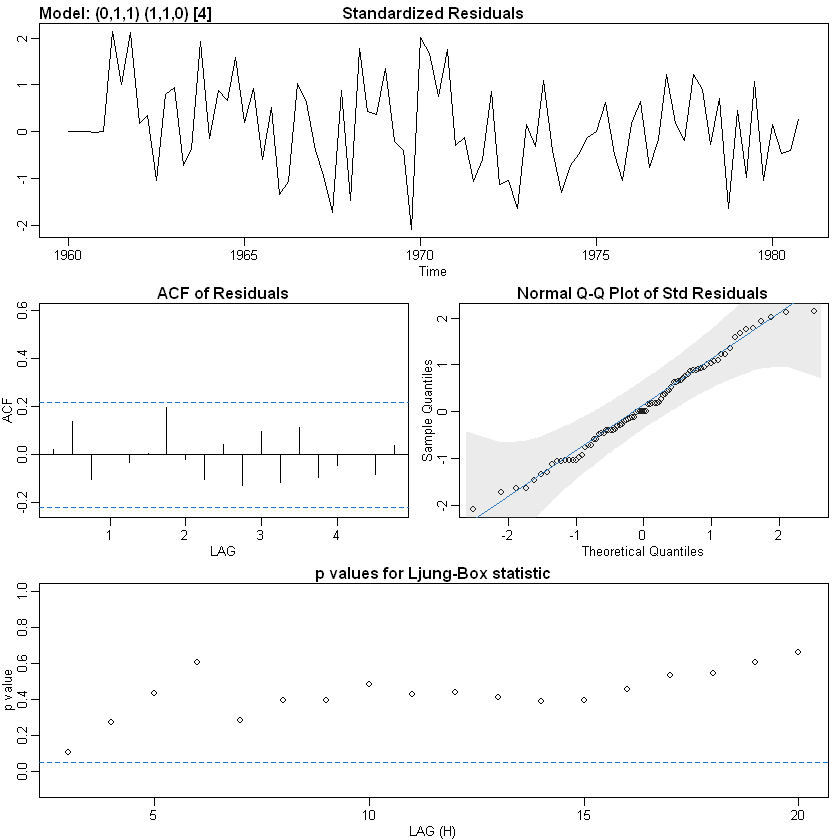

In [17]:
library(astsa)
sarima(log(jj), 0,1,1,1,1,0,4)

We can now write down our model:

$$
X_t = \text{Earnings} \\
Y_t = \text{log}(X_t) \\
(1-\Phi_1 B^4)(1-B)(1-B^4) = (1+\theta B)Z_t
$$


where $(1-\Phi_1 B^4)$ is seasonal autoregressive term, $(1-B)$ non-seasonal difference, $(1-B^4)$ seasonal difference term and $(1+\theta B)$ is non-seasonal moving average term.

$$
Y_t = Y_{t-1}+(\Phi + 1)Y_{t-4} - (\Phi + 1)Y_{t-5} - \Phi Y_{t-8} + \Phi Y_{t-9} + Z_t + \theta Z_{t-1} \\
Y_t = Y_{t-1}+0.678Y_{t-4} - 0.678Y_{t-5} + 0.322 Y_{t-8} - 0.322 Y_{t-9} + Z_t + 0.6796 Z_{t-1} \\
Z_t = \text{Normal}(0.007913)
$$

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


Attaching package: 'forecast'


The following object is masked from 'package:astsa':

    gas




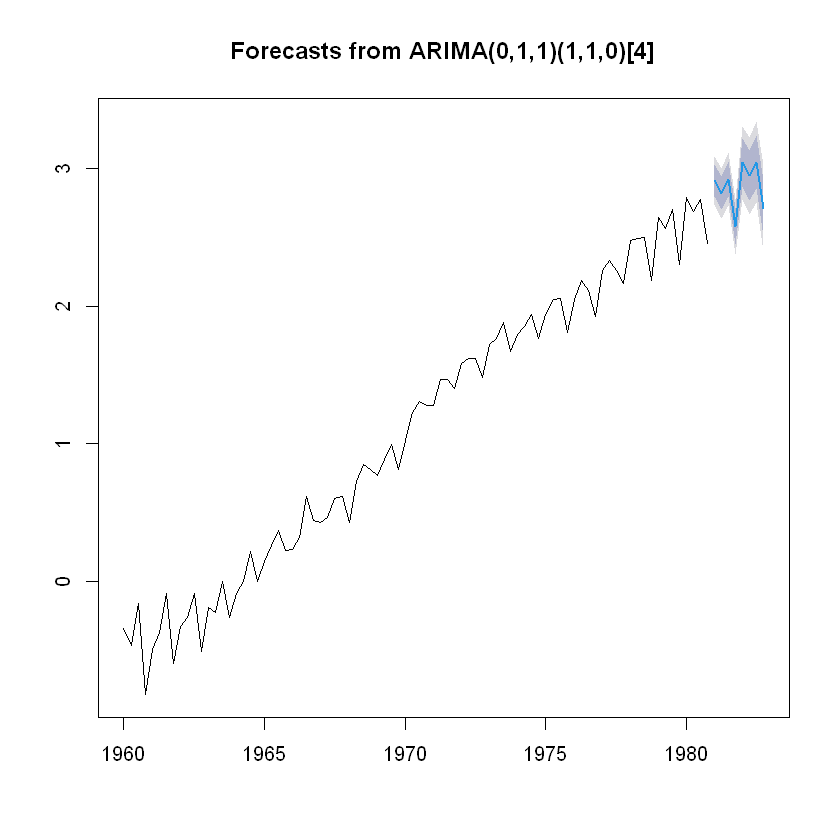

In [19]:
library(forecast)
model = arima(x=log(jj), order=c(0,1,1), seasonal=list(order=c(1,1,0), period=4))
plot(forecast(model))